# Generalized QSP

In [1]:
from qualtran.bloqs.qubitization_walk_operator_test import get_walk_operator_for_1d_ising_model
from qualtran.bloqs.generalized_qsp import GeneralizedQSP
from qualtran.drawing import show_bloq

`GeneralizedQSP` implements the Quantum Eigenvalue Transform on a unitary $U$ using QSP. Given a complex GQSP polynomial $P$ (and its complement $Q$), it implements the unitary:
$$U' = \begin{bmatrix} P(U) & \cdot \\ Q(U) & \cdot \end{bmatrix}$$

Here, the polynomials $P, Q$ must satisfy the following constraint:

$$\left| P(e^{i\theta}) \right|^2 + \left| Q(e^{i\theta}) \right|^2 = 1 ~~\text{for every}~ \theta \in [0, 2\pi]$$

A polynomial $P$ is said to be a GQSP polynomial iff it satisfies $\left| P(e^{i\theta}) \right|^2 \le 1$ for every $\theta \in [0, 2\pi]$. 

Reference: https://doi.org/10.48550/arXiv.2308.01501

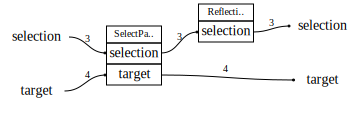

In [2]:
U = get_walk_operator_for_1d_ising_model(4, 2e-1)
show_bloq(U.decompose_bloq())

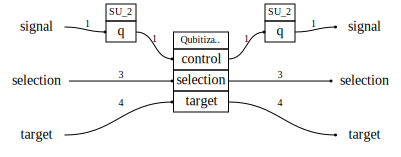

In [3]:
pU = GeneralizedQSP(U, (0.5, 0.5), (-0.5, 0.5))
show_bloq(pU.decompose_bloq())

There is also a method that directly computes $Q$ from $P$:

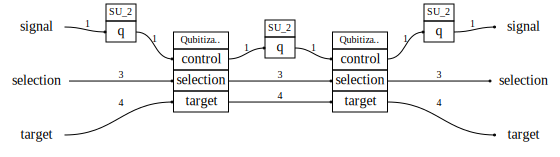

In [4]:
pU = GeneralizedQSP.from_qsp_polynomial(U, (0.5, 0, 0.5))
show_bloq(pU.decompose_bloq())

### Negative degree terms

To apply GQSP for a polynomial $P'(z) = z^{-k} P(z)$, we can just pass the polynomial $P$ along with negative power $k$.
The QSP angle sequence is the same for both, and $P'$ can be achieved by running $(U^\dagger)^k$ at any point in the circuit.

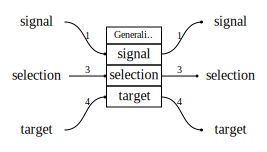

In [5]:
pU = GeneralizedQSP.from_qsp_polynomial(U, (0.5, 0, 0.5), negative_power=1)
show_bloq(pU)